In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [3]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [4]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

data_split_dict['high'] = MPRA_df[cell_types].mean(axis=1) > 1


# 计算每条序列在不同细胞类型中的最大值和最小值之差
MPRA_df['range'] = MPRA_df[cell_types].max(axis=1, skipna=True) - MPRA_df[cell_types].min(axis=1, skipna=True)
# 计算 range 的第95百分位
threshold = np.percentile(MPRA_df['range'].dropna(), 95)
# 前5%的高差值序列为 diff，其余为 const
data_split_dict['diff'] = MPRA_df['range'] > threshold
data_split_dict['const'] = ~data_split_dict['diff']


for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
high 78990
diff 38034
const 722645


In [4]:
# 初始化空 DataFrame，行是 assay，列是 cell types + 'All'
corr_df = pd.DataFrame()

for assay in assays:
    pred_list = []
    true_list = []

    for cell_type in cell_types:
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]

        r, _ = pearson(pred, true)
        corr_df.loc[cell_type, assay] = r

        pred_list.append(pred)
        true_list.append(true)

    # 合并后的相关性
    pred_all = np.concatenate(pred_list)
    true_all = np.concatenate(true_list)
    r, _ = pearson(pred_all, true_all)
    corr_df.loc['All', assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.535,0.483,0.487,0.195,0.406,0.361,0.335,0.400
HepG2,0.483,0.502,0.454,0.218,0.336,0.359,NaN,0.384
SK-N-SH,0.420,0.495,0.490,0.267,NaN,0.252,NaN,0.355
HCT116,0.483,0.500,0.500,0.336,0.483,0.334,NaN,0.376
A549,0.347,0.363,0.361,NaN,0.298,NaN,0.215,0.251
All,0.469,0.483,0.471,0.247,0.387,0.326,0.304,0.368


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

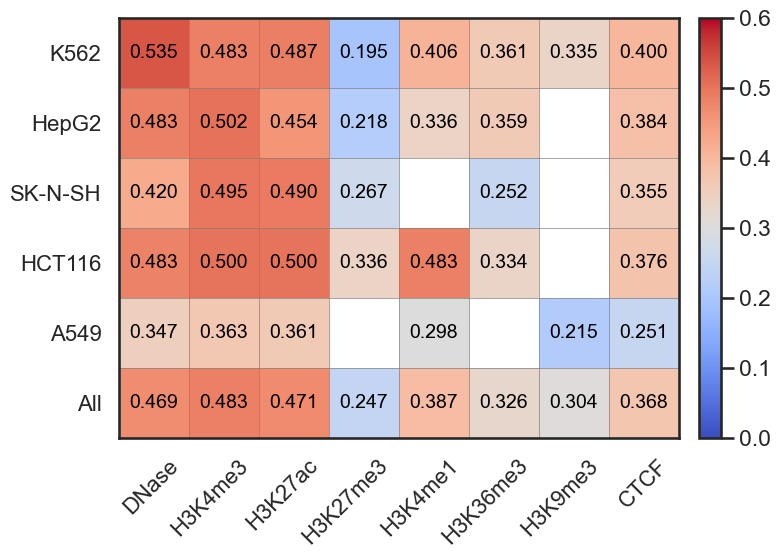

In [36]:
sns.set_style("white")

# 提取数据
data = corr_df.values
row_labels = corr_df.index.tolist()
col_labels = corr_df.columns.tolist()

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

# 绘制热图
im = ax.imshow(data, cmap='coolwarm', vmin=0, vmax=0.6)

# 设置 divider 来控制 colorbar 的轴
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)  # size 为 colorbar 宽度，pad 为间距

# 添加 colorbar
cbar = fig.colorbar(im, cax=cax)

# 添加文本注释（跳过 NaN）
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=14)

# 设置坐标轴标签
ax.set_xticks(np.arange(len(col_labels))+0.4)
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(row_labels, fontsize=16)

# 设置灰色网格线
ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor', color='gray', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # 自动布局和保存
# plt.tight_layout()
plt.savefig('figures/Gosai_MPRA_correlation_VEFs_activity_heatmap.png', dpi=400)

0.3050754312887567 0.2255531472863943


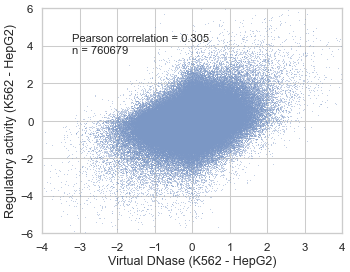

In [72]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']
r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1)
plt.text(
    x=0.1, y=0.8, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel(f'Virtual {assay} (K562 - HepG2)')
plt.ylabel(f'Regulatory activity (K562 - HepG2)')
plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_K562-HepG2.png', dpi=400)
plt.show()

0.5273795592950066 0.4876885907208658


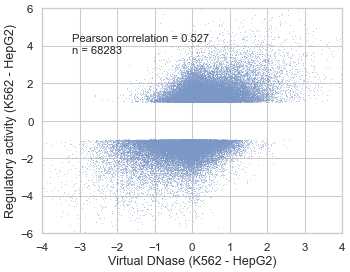

In [73]:
sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

x = MPRA_df[f'K562_DNase'] - MPRA_df[f'HepG2_DNase']
y = MPRA_df[f'K562'] - MPRA_df[f'HepG2']

cond = (y.abs() > 1)
x = x[cond]
y = y[cond]

r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

g = sns.scatterplot(x=x, y=y, s=1)
plt.text(
    x=0.1, y=0.8, transform=g.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel(f'Virtual {assay} (K562 - HepG2)')
plt.ylabel(f'Regulatory activity (K562 - HepG2)')
plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_K562-HepG2_diff.png', dpi=400)
plt.show()

In [ ]:
# normalize < 0

In [5]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')

In [6]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3']

In [8]:
print(MPRA_df[cell_types].mean(0))
print(MPRA_df[cell_types].std(0))

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
print(MPRA_df[cols].mean(), MPRA_df[cols].std())

K562      -0.004
HepG2     -0.006
SK-N-SH   -0.005
HCT116     0.026
A549      -0.045
dtype: float64
K562      0.994
HepG2     0.994
SK-N-SH   0.993
HCT116    1.052
A549      0.903
dtype: float64
K562_DNase         -0.007
K562_H3K4me3       -0.010
K562_H3K27ac       -0.007
K562_CTCF          -0.009
K562_H3K27me3      -0.006
K562_H3K4me1       -0.008
K562_H3K36me3      -0.008
K562_H3K9me3       -0.017
HepG2_DNase        -0.009
HepG2_H3K4me3      -0.010
HepG2_H3K27ac      -0.009
HepG2_CTCF         -0.008
HepG2_H3K27me3     -0.010
HepG2_H3K4me1      -0.005
HepG2_H3K36me3     -0.010
HepG2_H3K9me3         NaN
SK-N-SH_DNase      -0.009
SK-N-SH_H3K4me3    -0.010
SK-N-SH_H3K27ac    -0.004
SK-N-SH_CTCF       -0.008
SK-N-SH_H3K27me3   -0.011
SK-N-SH_H3K4me1       NaN
SK-N-SH_H3K36me3   -0.006
SK-N-SH_H3K9me3       NaN
HCT116_DNase       -0.007
HCT116_H3K4me3     -0.011
HCT116_H3K27ac     -0.007
HCT116_CTCF        -0.007
HCT116_H3K27me3    -0.006
HCT116_H3K4me1     -0.009
HCT116_H3K36me3    -0.012

In [11]:
corr_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        x = df[f'{cell_type}_{assay}']
        y = df[cell_type]
        r, _ = pearson(x, y)
        corr_df.loc[cell_type, assay] = r
corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF,H3K27me3,H3K4me1,H3K36me3,H3K9me3
K562,0.535,0.483,0.487,0.400,0.195,0.406,0.361,0.335
HepG2,0.483,0.502,0.454,0.384,0.218,0.336,0.359,NaN
SK-N-SH,0.420,0.495,0.490,0.355,0.267,NaN,0.252,NaN
HCT116,0.483,0.500,0.500,0.376,0.336,0.483,0.334,NaN
A549,0.347,0.363,0.361,0.251,NaN,0.298,NaN,0.215


In [15]:
corr_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        x = df[f'{cell_type}_{assay}']
        y = df[cell_type]
        cond = x < 0
        x = x[cond]
        y = y[cond]
        r, _ = pearson(x, y)
        corr_df.loc[cell_type, assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF,H3K27me3,H3K4me1,H3K36me3,H3K9me3
K562,-0.000,0.031,0.050,0.043,-0.027,-0.042,-0.003,0.083
HepG2,0.017,0.071,0.044,0.038,-0.048,-0.046,0.014,NaN
SK-N-SH,0.037,0.053,0.119,0.006,-0.026,NaN,-0.068,NaN
HCT116,-0.069,0.002,0.025,-0.013,-0.027,-0.014,-0.039,NaN
A549,-0.086,0.009,-0.038,-0.031,NaN,-0.086,NaN,-0.040


In [16]:
corr_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        x = df[f'{cell_type}_{assay}']
        y = df[cell_type]
        cond = x > 0
        x = x[cond]
        y = y[cond]
        r, _ = pearson(x, y)
        corr_df.loc[cell_type, assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF,H3K27me3,H3K4me1,H3K36me3,H3K9me3
K562,0.611,0.521,0.517,0.359,0.258,0.483,0.435,0.304
HepG2,0.507,0.488,0.451,0.306,0.242,0.351,0.370,NaN
SK-N-SH,0.471,0.508,0.471,0.306,0.277,NaN,0.307,NaN
HCT116,0.553,0.526,0.521,0.320,0.379,0.497,0.372,NaN
A549,0.480,0.396,0.430,0.264,NaN,0.364,NaN,0.258


In [17]:
corr_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        x = df[f'{cell_type}_{assay}'].copy()
        y = df[cell_type].copy()

        x[x<0] = 0
        r, _ = pearson(x, y)
        corr_df.loc[cell_type, assay] = r

corr_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF,H3K27me3,H3K4me1,H3K36me3,H3K9me3
K562,0.600,0.531,0.530,0.406,0.244,0.488,0.427,0.348
HepG2,0.528,0.530,0.486,0.381,0.259,0.394,0.399,NaN
SK-N-SH,0.462,0.523,0.499,0.362,0.309,NaN,0.317,NaN
HCT116,0.543,0.536,0.535,0.376,0.371,0.524,0.384,NaN
A549,0.438,0.397,0.414,0.273,NaN,0.360,NaN,0.257


In [29]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    corr_df = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            corr_df.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(corr_df)

DNase
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.600        0.446          0.453         0.492       0.487
HepG2         0.567        0.528          0.481         0.519       0.529
SK-N-SH       0.526        0.434          0.462         0.471       0.480
HCT116        0.556        0.488          0.483         0.543       0.524
A549          0.432        0.363          0.337         0.433       0.438
H3K4me3
         K562_H3K4me3  HepG2_H3K4me3  SK-N-SH_H3K4me3  HCT116_H3K4me3  A549_H3K4me3
K562            0.531          0.447            0.471           0.486         0.464
HepG2           0.538          0.530            0.507           0.537         0.519
SK-N-SH         0.510          0.469            0.523           0.515         0.491
HCT116          0.512          0.485            0.500           0.536         0.507
A549            0.380          0.356            0.380           0.405         0.397
H3K27ac
         K562_H3K27ac  HepG2_H

In [5]:
# activity vs VEFs

0.7853964427140128 0.6718794190415383


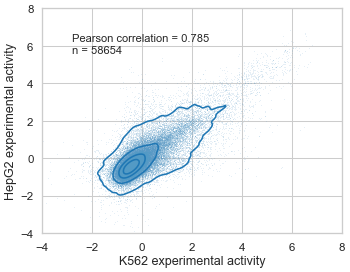

In [6]:
i = 0

sns.set_theme(context='talk', style='whitegrid')
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

cond = data_split_dict[f'test']
x = MPRA_df.loc[cond, f'K562']
y = MPRA_df.loc[cond, f'HepG2']
r = pearson(x, y)[0]
r2 = spearman(x, y)[0]
print(r, r2)

scatter = sns.scatterplot(x=x, y=y, s=1, alpha=0.3, color=tab20_colors[2*i])
kde = sns.kdeplot(x=x, y=y, fill=False, levels=5, color=tab20_colors[2*i])

plt.text(
    x=0.1, y=0.8, transform=scatter.transAxes, fontsize=16,
    s=f'Pearson correlation = {r:.3f} \nn = {len(x)}', 
)

plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel(f'K562 experimental activity')
plt.ylabel(f'HepG2 experimental activity')
plt.savefig(f'figures/Gosai_MPRA_Sei_K562_HepG2_scatter.png', dpi=400)
plt.show()

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000   NaN
A549    0.724  0.730    0.777     NaN 1.000
diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.446    0.421   0.510 0.519
HepG2   0.446  1.000    0.600   0.671 0.576
SK-N-SH 0.421  0.600    1.000   0.636 0.747
HCT116  0.510  0.671    0.636   1.000   NaN
A549    0.519  0.576    0.747     NaN 1.000
test
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.785    0.745   0.817 0.698
HepG2   0.785  1.000    0.819   0.870 0.712
SK-N-SH 0.745  0.819    1.000   0.819 0.757
HCT116  0.817  0.870    0.819   1.000   NaN
A549    0.698  0.712    0.757     NaN 1.000
test+diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.413    0.409   0.517 0.450
HepG2   0.413  1.000    0.560   0.654 0.531
SK-N-SH 0.409  0.560    1.000   0.609 0.714
HCT116

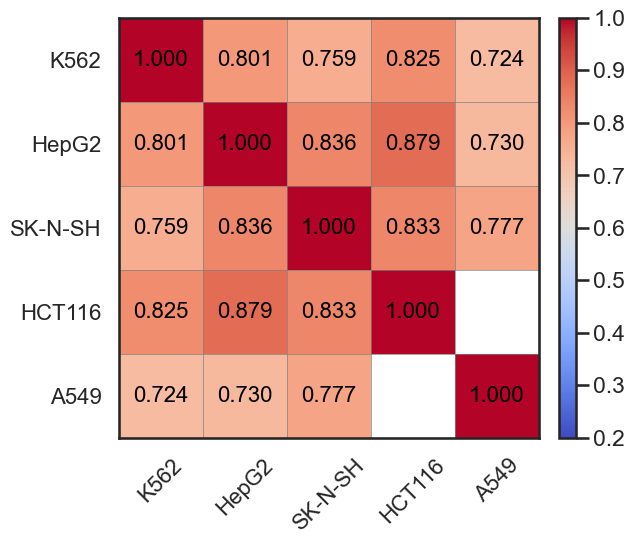

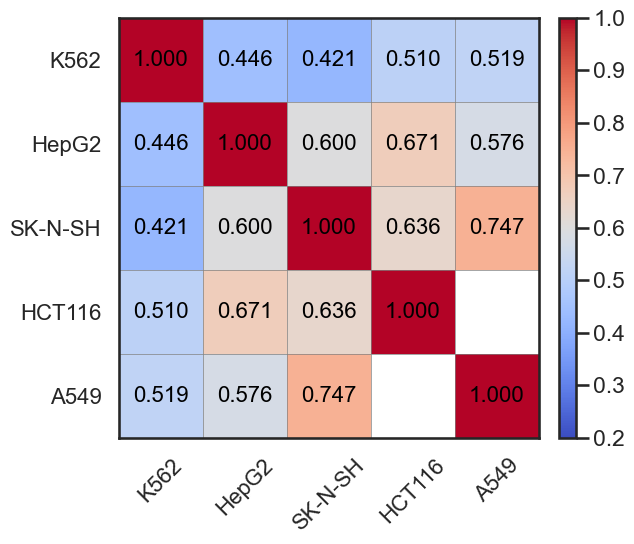

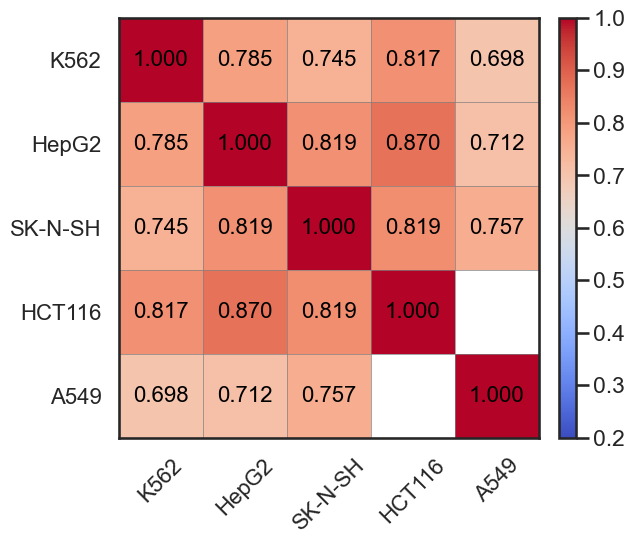

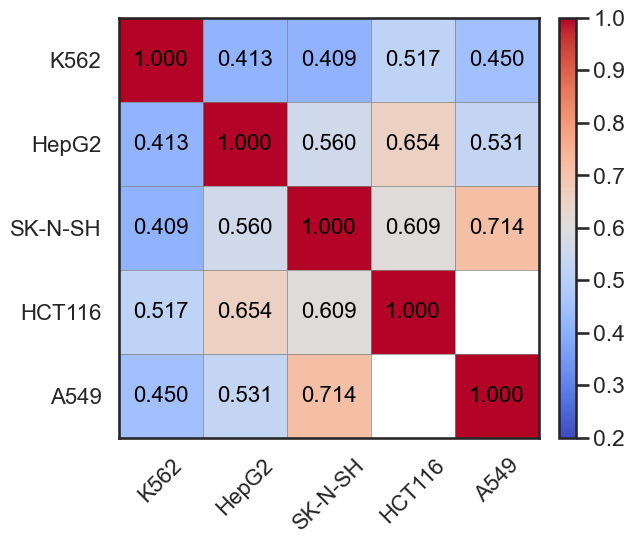

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for data_split in ['total', 'diff', 'test', 'test+diff']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific':
                cond = data_split_dict[f'{cell_type}_{data_split}']
            else:
                cond = data_split_dict[data_split]
            x = MPRA_df.loc[cond, f'{cell_type}']
            y = MPRA_df.loc[cond, f'{cell_type_2}']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}'] = r
    pearson_df.loc['HCT116', 'A549'] = np.nan
    pearson_df.loc['A549', 'HCT116'] = np.nan
    pearson_df = pearson_df.astype(float)
    print(data_split)
    print(pearson_df)



    data = np.array(pearson_df.values)
    row_labels = list(pearson_df.index)
    col_labels = list(pearson_df.columns)




    sns.set_theme(context='talk', style="white")
    fig, ax = plt.subplots(figsize=(7, 6), dpi=100)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    im = ax.imshow(data, cmap='coolwarm', vmin=0.2, vmax=1.0)

    # 设置 divider 来控制 colorbar 的轴
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.2)  # size 为 colorbar 宽度，pad 为间距
    cbar = fig.colorbar(im, cax=cax)


    # 添加文本注释（跳过 NaN）
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = data[i, j]
            if not np.isnan(val):
                ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=16)

    # 设置坐标轴标签
    ax.set_xticks(np.arange(len(row_labels)))
    ax.set_yticks(np.arange(len(col_labels)))
    ax.set_xticklabels(row_labels, fontsize=16, rotation=45)
    ax.set_yticklabels(col_labels, fontsize=16)

    # 设置灰色网格线
    ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
    ax.grid(which='minor', color='gray', linewidth=0.5)
    ax.tick_params(which='minor', bottom=False, left=False)

    # 自动布局和保存
    # plt.tight_layout()
    plt.savefig(f'figures/Gosai_MPRA_activity_vs_activity_{data_split}_heatmap.png', dpi=400)

In [12]:
# plot acitiviy vs pred correlation across cell types

# 0529 is no normalization training

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
y_pred = np.load(f'../saved/0529_Gosai_MPRA_MyResTransformer3_seq_epi/0530_033808/Gosai_MPRA_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

total
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.837       0.771         0.770        0.799      0.786
HepG2        0.810       0.844         0.808        0.828      0.829
SK-N-SH      0.794       0.808         0.834        0.809      0.817
HCT116       0.809       0.813         0.796        0.820        NaN
A549         0.706       0.701         0.714          NaN      0.729
diff
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.739       0.538         0.573        0.616      0.581
HepG2        0.575       0.715         0.601        0.656      0.684
SK-N-SH      0.593       0.625         0.703        0.641      0.652
HCT116       0.664       0.686         0.661        0.731        NaN
A549         0.622       0.647         0.698          NaN      0.697
test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.837       0.771         0.770        0.799      0.786
HepG2        0.810

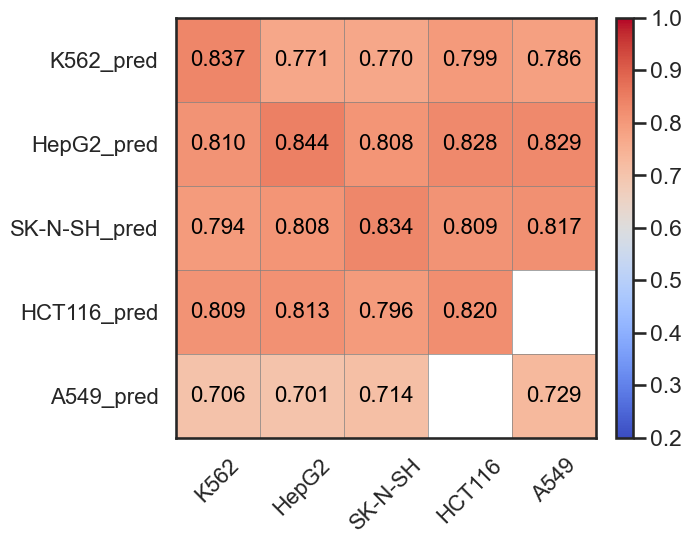

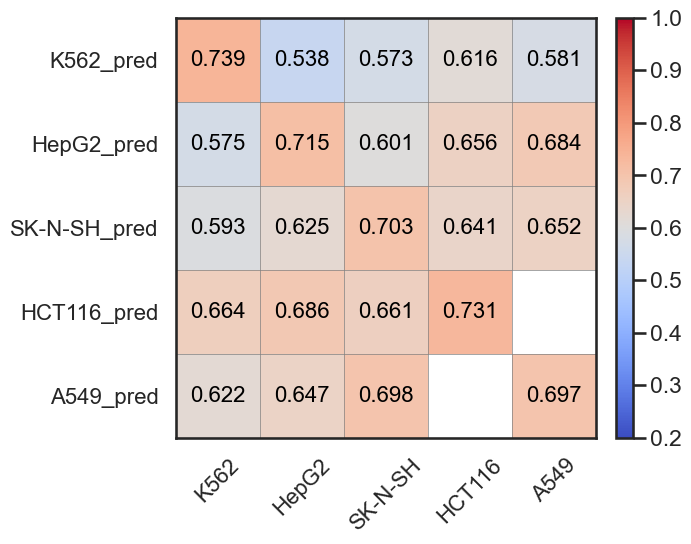

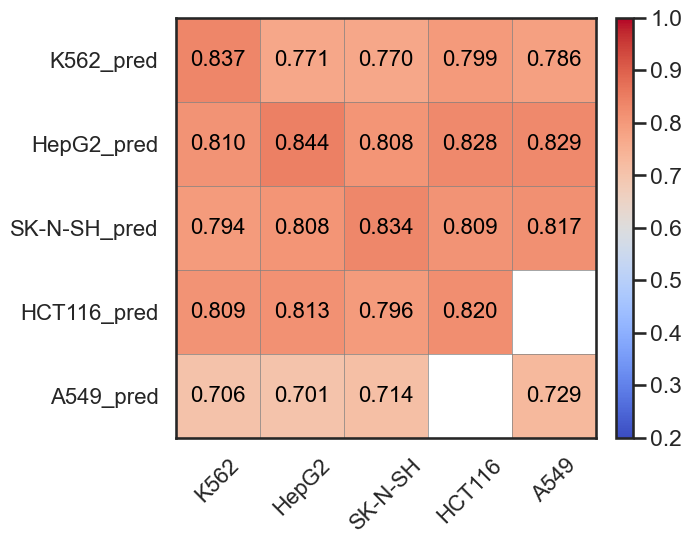

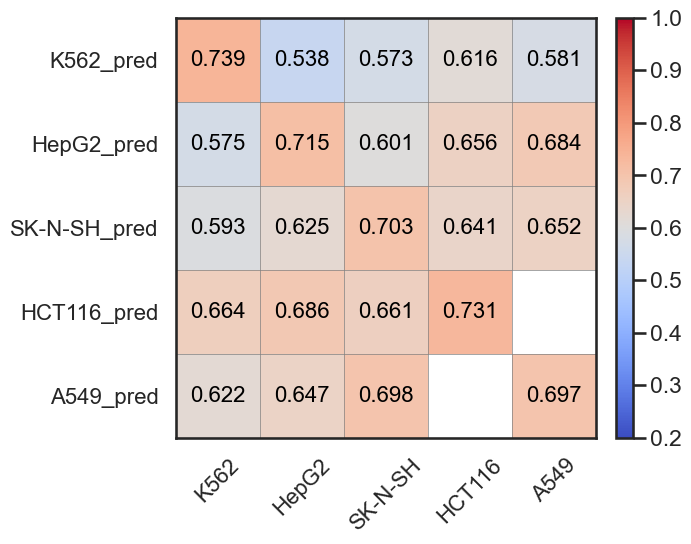

In [15]:
for data_split in ['total', 'diff', 'test', 'test+diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            cond_0 = data_split_dict['test']
            cond_1 = data_split_dict[data_split]
            cond = cond_0 & cond_1
            x = MPRA_df.loc[cond, f'{cell_type}']
            y = MPRA_df.loc[cond, f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
    pearson_df.loc['HCT116', 'A549_pred'] = np.nan
    pearson_df.loc['A549', 'HCT116_pred'] = np.nan
    print(data_split)
    print(pearson_df)





    data = np.array(pearson_df.values)
    row_labels = list(pearson_df.index)
    col_labels = list(pearson_df.columns)



    sns.set_theme(context='talk', style="white")
    fig, ax = plt.subplots(figsize=(7, 6), dpi=100)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    im = ax.imshow(data, cmap='coolwarm', vmin=0.2, vmax=1.0)

    # 设置 divider 来控制 colorbar 的轴
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.2)  # size 为 colorbar 宽度，pad 为间距
    cbar = fig.colorbar(im, cax=cax)


    # 添加文本注释（跳过 NaN）
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = data[i, j]
            if not np.isnan(val):
                ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='black', fontsize=16)

    # 设置坐标轴标签
    ax.set_xticks(np.arange(len(row_labels)))
    ax.set_yticks(np.arange(len(col_labels)))
    ax.set_xticklabels(row_labels, fontsize=16, rotation=45)
    ax.set_yticklabels(col_labels, fontsize=16)

    # 设置灰色网格线
    ax.set_xticks(np.arange(data.shape[1]+1)-0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-0.5, minor=True)
    ax.grid(which='minor', color='gray', linewidth=0.5)
    ax.tick_params(which='minor', bottom=False, left=False)

    # 自动布局和保存
    # plt.tight_layout()
    plt.savefig(f'figures/Gosai_MPRA_pred_vs_activity_{data_split}_heatmap.png', dpi=400)